# Series Fit

In this example, all impedance spectra in a directory are fitted with a model.

Then a parameter of an element of the model is plotted over the changing series parameter.

In [1]:
from zahner_analysis.analysis_tools.eis_fitting import EisFitting
from zahner_analysis.file_import.impedance_model_import import IsfxModelImport
from zahner_analysis.file_import.ism_import import IsmImport
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

import os
import glob
import re

# Import the model

First, the model is loaded from the file on the hard disk.

The model was created with the [Zahner Analysis](https://zahner.de/products-details/software/Zahner-Analysis). For simple models, the standard values of the Zahner Analysis can be used for the fit. This is only necessary for more complex models.

Then an [EisFitting](https://doc.zahner.de/zahner_analysis/analyze/index.html#zahner_analysis.analysis_tools.eis_fitting.EisFitting) object is created with the model. And the model with the initial value is output to the console.

In [2]:
if __name__ == "__main__":
    impedanceCircuitModel = IsfxModelImport(r"diode-ac-model.isfx")
    print(impedanceCircuitModel)
    
    print(f"Resistance initial value: {impedanceCircuitModel['R0']['R'].getValue()}\n")

    fitting = EisFitting()

inductor : L0
      L:  1.000e-07 H        fixed: False
resistor : R0
      R:  1.000e+02 Ω        fixed: False
capacitor : C0
      C:  1.000e-05 F        fixed: False

Resistance initial value: 100.0



# Selection of files for the fit

In the subfolder *measured_spectras* all files ending with *_mvdc.ism* are selected for the fit.
The file name contains the voltage value of the measurement, which is different for each measurement.

In [3]:
    spectras = glob.glob(os.path.join("measured_spectras", "*_mvdc.ism"))

Jupyter does not support loops over multiple cells, so the explanations are given below and in the code block are the headings of the following explanations.

# Fitting the spectra in a loop

The array *spectras* contains all file paths which should be fitted. Then the fit function is called for each of these files.

# Append arrys with fit results

The predefined arrays *measuredVoltageValues* and *fittedResistanceValues* for the voltage values and resistances are filled with the values.

With a [regular expression](https://docs.python.org/3/library/re.html) the voltage is extracted from the filename.

With the [[]-operator](https://doc.zahner.de/zahner_analysis/file_import/index.html#models-circuits) the parameters are read from the fitted model and added to the array.

# Save the fit results

Then, for each data set, the fit result is stored in the subdirectory *fitted_spectras* in a folder with the same name as the ism file.

# Setting the new model for the next fit

Based on the filename, the models are fitted in the correct order, from lower to higher voltage.

**To speed up the fit for the series measurement, the last fitted model is set as the new model for the next fit.**

In [4]:
    measuredVoltageValues = []
    fittedResistanceValues = []
    
    for spectra in spectras:
        # Fitting the spectra in a loop
        print(f"File: {spectra}")
        fittingResult = fitting.fit(impedanceCircuitModel, IsmImport(spectra))

        # Append arrys with fit results
        voltagePattern = r"(\d+)_mvdc.ism"
        voltage = float(re.search(voltagePattern, spectra)[1]) / 1000.0
        measuredVoltageValues.append(voltage)
        fittedResistanceValue = fittingResult.getFittedModel()["R0"]["R"].getValue()
        fittedResistanceValues.append(fittedResistanceValue)
        
        voltageFormatter = EngFormatter(unit='V', sep=' ')
        resistanceFormatter = EngFormatter(unit='Ω', sep=' ')
        print(f"Voltage: {voltageFormatter.format_data(voltage)} Fitted Resistance: {resistanceFormatter.format_data(fittedResistanceValue)}")

        # Save the fit results
        filename = os.path.splitext(os.path.split(spectra)[1])[0]
        fittingResult.save(path="fitted_spectras", foldername=filename)
        
        # Setting the new model for the next fit
        impedanceCircuitModel = fittingResult.getFittedModel()

File: measured_spectras\000_mvdc.ism
Voltage: 0 V Fitted Resistance: 8.62217 kΩ
File: measured_spectras\025_mvdc.ism
Voltage: 25 mV Fitted Resistance: 5.7388 kΩ
File: measured_spectras\050_mvdc.ism
Voltage: 50 mV Fitted Resistance: 2.44172 kΩ
File: measured_spectras\075_mvdc.ism
Voltage: 75 mV Fitted Resistance: 942.034 Ω
File: measured_spectras\100_mvdc.ism
Voltage: 100 mV Fitted Resistance: 357.636 Ω
File: measured_spectras\125_mvdc.ism
Voltage: 125 mV Fitted Resistance: 135.667 Ω
File: measured_spectras\150_mvdc.ism
Voltage: 150 mV Fitted Resistance: 51.5589 Ω
File: measured_spectras\175_mvdc.ism
Voltage: 175 mV Fitted Resistance: 19.5706 Ω
File: measured_spectras\200_mvdc.ism
Voltage: 200 mV Fitted Resistance: 7.47608 Ω
File: measured_spectras\225_mvdc.ism
Voltage: 225 mV Fitted Resistance: 2.87511 Ω
File: measured_spectras\250_mvdc.ism
Voltage: 250 mV Fitted Resistance: 1.11196 Ω
File: measured_spectras\275_mvdc.ism
Voltage: 275 mV Fitted Resistance: 448.963 mΩ
File: measured_spec

# Plotting the data

The two arrays with resistance values and voltage values are displayed in a diagram with [matplotlib](https://matplotlib.org/).

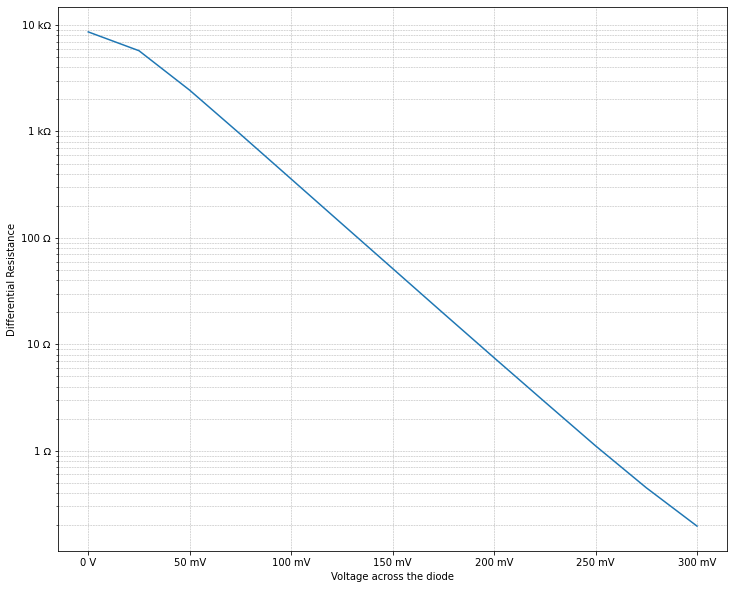

In [5]:
    fig, (ax) = plt.subplots(1, 1)
    
    ax.semilogy(measuredVoltageValues, fittedResistanceValues)
    ax.xaxis.set_major_formatter(EngFormatter(unit="V"))
    ax.yaxis.set_major_formatter(EngFormatter(unit="Ω"))
    ax.set_xlabel(r"Voltage across the diode")
    ax.set_ylabel(r"Differential Resistance")
    ax.grid(which="both", linestyle='--', linewidth=0.5)
    fig.set_size_inches(12, 10)
    fig.savefig("RvsU.svg")
    plt.show()